In [3]:
# Our data management libraries
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz 

# Use inline so our visualizations display in notebook
%matplotlib inline

import squarify
import matplotlib.dates as dates
from datetime import datetime

In [6]:
#df = pd.read_csv('ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv',chunksize = 10000)
df = pd.read_csv('/Users/mahernigar/Desktop/ECommerce_behavior/data/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv', nrows = 10000000) 
df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [7]:
#Number of each catagory, view, purchase, cart
gb1 = df.groupby("event_type")["event_type"].count().sort_values(ascending=False)
gb1


event_type
view        9731128
purchase     147105
cart         121767
Name: event_type, dtype: int64

### View, cart, and purchases percentages

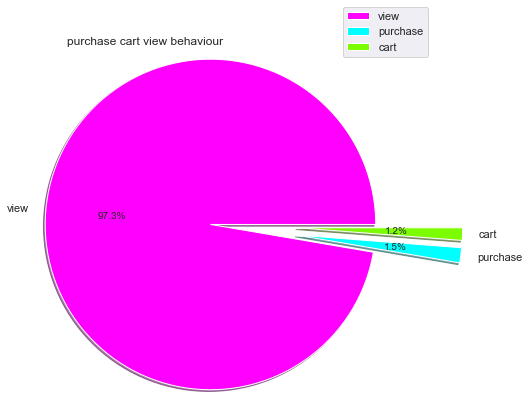

In [8]:
#Pie char for view, purchase, cart
explode = [0, 1, 1]
plt.title('purchase cart view behaviour', x = 0.2, y = 1.3)
gb1.plot(kind = 'pie', autopct='%1.1f%%',
         colors = ['fuchsia','cyan', 'lawngreen'],
        explode = explode, shadow = True, radius = 1.9)

index = plt.legend((df['event_type'].value_counts().index), loc = 'upper right', borderaxespad = 0, bbox_to_anchor=(1.5, 1.5))


### Top 10 brands

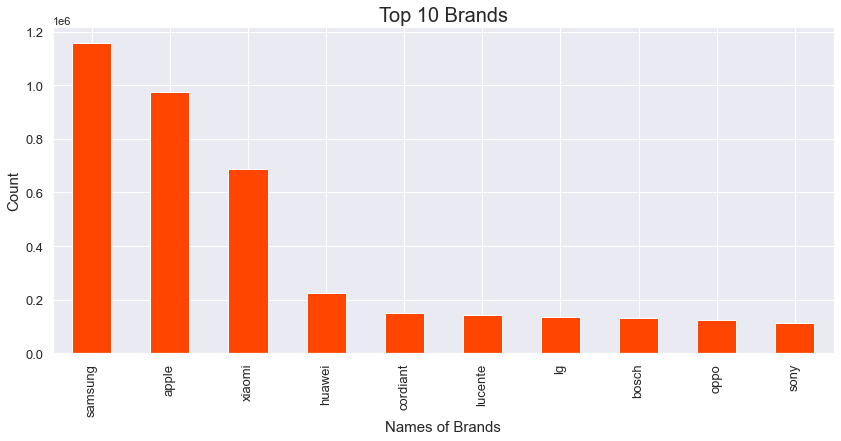

In [5]:
#Most popular brands
gb1 = df['brand'].value_counts().head(10)

gb1.plot.bar(figsize = (14, 6), fontsize = 13, color = 'orangered')
plt.title('Top 10 Brands', fontsize = 20)
plt.xlabel('Names of Brands', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


In [11]:
#gb2 = df.groupby("brand")["event_type"].count().sort_values
#gb2
top_player = df['brand'].value_counts()[0]
second_player = df['brand'].value_counts()[1]
last_player = df['brand'].value_counts()[-1]
#top_player
#List of people who has bought or added products to the cart
cart_purchase_users = df.loc[df["event_type"].isin(["purchase"])]
#cart_purchase_users.dropna(how='any', inplace=True)
print(cart_purchase_users)



                      event_time event_type  product_id          category_id  \
107      2019-11-01 00:00:41 UTC   purchase    13200605  2053013557192163841   
168      2019-11-01 00:01:04 UTC   purchase     1005161  2053013555631882655   
707      2019-11-01 00:04:51 UTC   purchase     1004856  2053013555631882655   
811      2019-11-01 00:05:34 UTC   purchase    26401669  2053013563651392361   
939      2019-11-01 00:06:33 UTC   purchase     1801881  2053013554415534427   
...                          ...        ...         ...                  ...   
9999675  2019-11-07 05:08:05 UTC   purchase     2601260  2053013563970159485   
9999712  2019-11-07 05:08:07 UTC   purchase     5000448  2053013566100866035   
9999750  2019-11-07 05:08:09 UTC   purchase     1004446  2053013555631882655   
9999823  2019-11-07 05:08:12 UTC   purchase     1004750  2053013555631882655   
9999960  2019-11-07 05:08:19 UTC   purchase     1004873  2053013555631882655   

                     category_code     

In [15]:
#This is showing all the products of samsung
samsung_phone_purchase = (df.loc[df["brand"].isin(["samsung"])])
samsung_phone_purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
14,2019-11-01 00:00:05 UTC,view,4600658,2053013563944993659,appliances.kitchen.dishwasher,samsung,411.83,526595547,aab33a9a-29c3-4d50-84c1-8a2bc9256104
40,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a
51,2019-11-01 00:00:17 UTC,view,1800729,2053013554415534427,electronics.video.tv,samsung,289.33,515782589,f2081cf0-0ee3-4bf1-9b40-e5e580f9ace3
65,2019-11-01 00:00:23 UTC,view,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,436701163,50de79b1-b0ec-42c0-bbe0-8b5d2dc33e1e
88,2019-11-01 00:00:30 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,559213679,20a1a879-3cff-4d9a-9fc1-09bb9624e0d6
...,...,...,...,...,...,...,...,...,...
9999968,2019-11-07 05:08:19 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,240.93,567008584,be2cfb2c-ae17-4ed0-9c7b-a6bbb3dd9df9
9999969,2019-11-07 05:08:19 UTC,view,1004665,2053013555631882655,electronics.smartphone,samsung,824.35,514726884,1e537dc2-d20d-4c44-acae-716d3167b73c
9999982,2019-11-07 05:08:20 UTC,view,3601537,2053013563810775923,appliances.kitchen.washer,samsung,386.08,540505296,be3eb5c0-3a3c-4293-9e23-d57805bf914c
9999990,2019-11-07 05:08:21 UTC,view,3600661,2053013563810775923,appliances.kitchen.washer,samsung,306.05,518620512,819080aa-c8d6-40c6-99e6-0a44f4ef6cb0


# Price analysis for each top 10 brands!

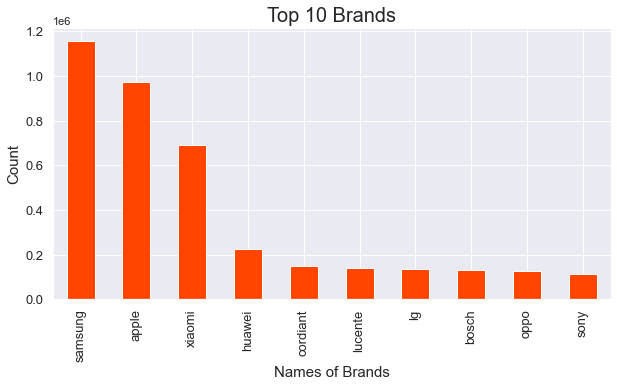

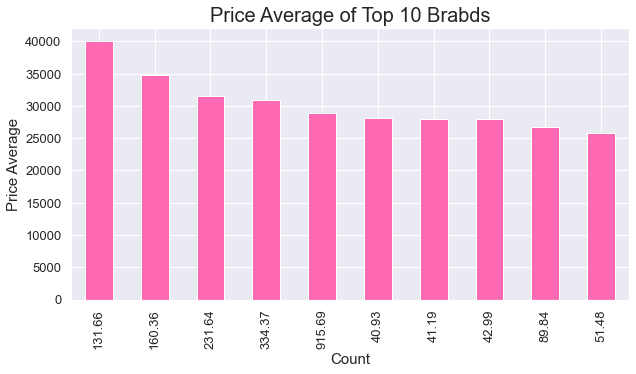

In [14]:


gb1 = df['brand'].value_counts().head(10)
gb2 = df['price'].value_counts().head(10)

gb1.plot.bar(figsize = (10, 5), fontsize = 13, color = 'orangered')
plt.title('Top 10 Brands', fontsize = 20)
plt.xlabel('Names of Brands', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

gb2.plot.bar(figsize = (10, 5), fontsize = 13, color = 'hotpink')
plt.title('Price Average of Top 10 Brabds', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Price Average', fontsize = 15)
plt.show()


# The Category customer interact the most with

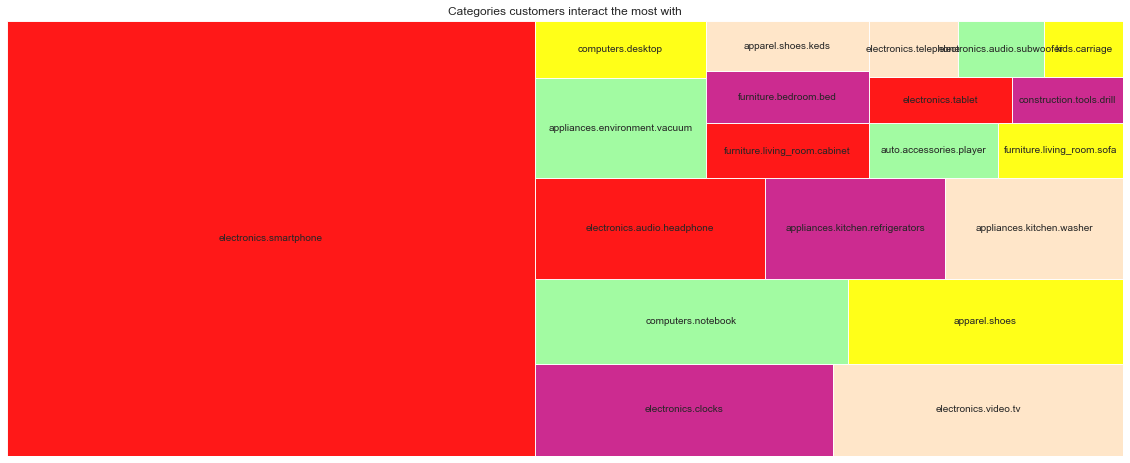

In [4]:
#which category customer interact the most with
plt.figure(figsize=(20,8))
top_category_n = 20
top_category = df.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category,label=top_category.index.array, color=["Red","MediumVioletRed","Bisque","PaleGreen","Yellow"], alpha=.9  )

plt.title('Categories customers interact the most with')
plt.axis('off')
plt.show()

#color=sb.color_palette("Spectral"


# A general view to demo the rate of visitors on each date

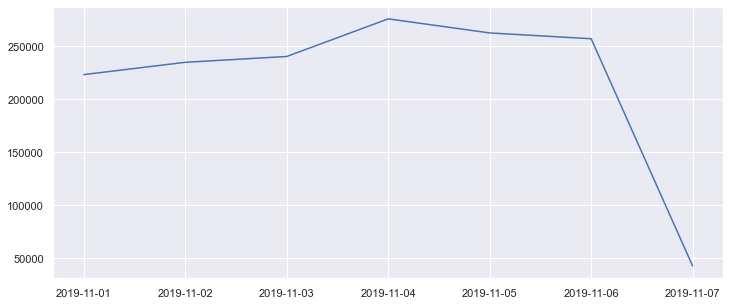

In [14]:
#No of visitors by date
data = df.loc[:,['event_time','user_id']]

#Dates from the data
data['event_time'] = data['event_time'].apply(lambda s: str(s)[0:10])
visitor_each_date = data.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_each_date['count']
plt.rcParams['figure.figsize'] = (12,5)

plt.plot(x,y)
plt.show()

# Event time query

In [15]:
df['event_time']=pd.to_datetime(df['event_time'], errors='coerce').dt.strftime('%w')
event_time_type = df.groupby(['event_time','event_type']).size().reset_index(name='total')
event_time_type['event_time'].head()

e_type=df.groupby('event_type').size().reset_index(name='total')

In [16]:
purchases = event_time_type.loc[event_time_type.event_type == 'purchase'] 
carts = event_time_type.loc[event_time_type.event_type == 'cart']
views = event_time_type.loc[event_time_type.event_type == 'view']

## Rate of view in each week days!

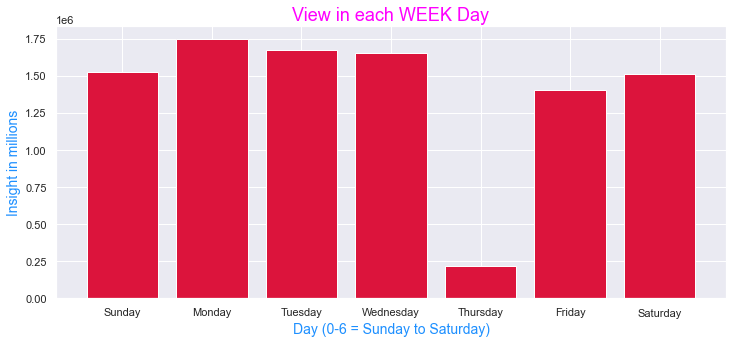

In [17]:
plt.figsize = (10, 5)
plt.bar(views['event_time'],views['total'],color='#DC143C')
plt.title('View in each WEEK Day', fontsize=18, color = '#FF00FF')
plt.xticks([0, 1, 2,3,4,5,6], ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xlabel('Day (0-6 = Sunday to Saturday)', fontsize=14, color = '#1E90FF')
plt.ylabel('Insight in millions', fontsize=14, color = '#1E90FF')
plt.show()

## Rate of adding to the cart in each week days!

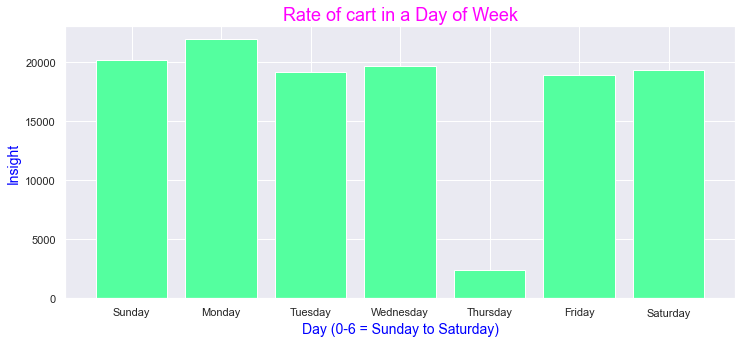

In [18]:
carts.head(7)
plt.figsize = (10, 5)
plt.bar(carts['event_time'],carts['total'],color='#54FF9F')
plt.title('Rate of cart in a Day of Week', fontsize=18, color = '#FF00FF')
plt.xticks([0, 1, 2,3,4,5,6], ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xlabel('Day (0-6 = Sunday to Saturday)', fontsize=14, color = '#0000FF')
plt.ylabel('Insight', fontsize=14, color = '#0000FF')
plt.show()

## Rate of purchases in each week days

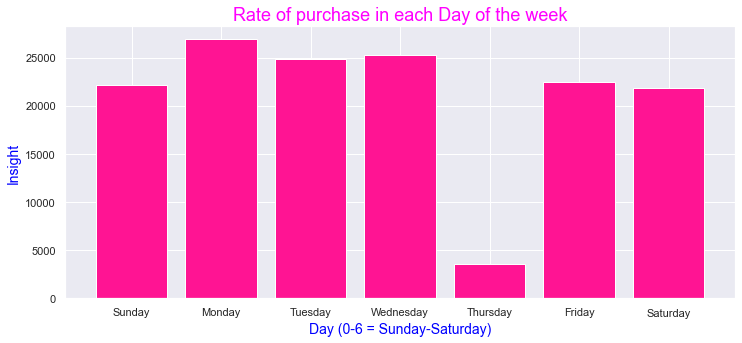

In [19]:
purchases.head(7)

plt.bar(purchases['event_time'],purchases['total'],color='#FF1493')
plt.xticks([0, 1, 2,3,4,5,6], ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Rate of purchase in each Day of the week', fontsize=18, color = '#FF00FF')
plt.xlabel('Day (0-6 = Sunday-Saturday)', fontsize=14, color = '#0000FF')
plt.ylabel('Insight', fontsize=14, color = '#0000FF')
plt.show()